In [246]:
import csv
import math
import numpy as np
import statistics
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.ndimage import label
from scipy.spatial.distance import correlation
from scipy.stats import pearsonr

In [247]:
def read_nums(fname: str) -> []:
    data_array = []
    try:
        with open(fname, 'r') as file:
            # 逐行读取文件内容
            for line in file:
                # 去除换行符并使用逗号分割
                line_data = line.strip().split(',')
                # 将分割后的数据添加到数组
                for n in line_data:
                    data_array.append(float(n))
    except FileNotFoundError:
        print(f"File not found: {file}")
        return None
    return data_array

def printArray(array):
    for i in range(len(array)):
        print(array[i])

In [248]:
def generate_super_exponential(size, lambda1, lambda2, p):
    u = np.random.rand(size)
    return np.where(u < p,
                    np.random.exponential(1/lambda1, size),
                    np.random.exponential(1/lambda2, size))


def generate_sequence(sequence):
    target_mean = np.mean(sequence)

    size = len(sequence)
    lambda1 = 1 / (target_mean * 0.2)  # 较小的均值
    lambda2 = 1 / (target_mean * 1.8)  # 较大的均值
    p = 0.5  # 权重，设定每个指数分布选取的概率

    while True:
        generatedSequence = generate_super_exponential(size, lambda1, lambda2, p)
        correlation, _ = pearsonr(np.sort(sequence), np.sort(generatedSequence))

        if (abs(np.var(generatedSequence) - np.var(sequence)) < 10) and (abs(np.mean(generatedSequence) - np.mean(sequence)) < 0.4):
            break  # 满足条件，退出循环

    # print("----")
    # print(np.mean(sequence))
    # print(np.var(sequence))
    # print(np.mean(generatedSequence))
    # print(np.var(generatedSequence))
    # 
    # print(correlation)
    # print("----")
    # printArray(generatedSequence)
    
    return generatedSequence

In [249]:
def math_expectation(nums:[])->float:
  return statistics.mean(nums)


def math_variance(nums:[]) -> float:
  aver = math_expectation(nums)
  result = 0
  for i in nums:
    result = (aver - i)**2 + result
  result = result/(len(nums)-1)
  return result


def math_standard_deviation(nums:[]) -> float:
  return math.sqrt(math_variance(nums))


def math_coeff_var(nums:[]) -> float:
  return math_standard_deviation(nums)/math_expectation(nums)


def math_margin_of_error(nums: [], level: float)->float:
  z_critical = stats.norm.ppf((1 + level) / 2)
  # 计算置信区间
  margin_of_error = z_critical * (math_standard_deviation(nums) / math.sqrt(len(nums)))
  return margin_of_error


def cal_characteristics(nums:[], size: int):
  real_math_exception = math_expectation(nums)
  real_deviation = math_standard_deviation(nums)
  real_coeff_var = math_coeff_var(nums)
  real_variance = math_variance(nums)
  real_level_95 = math_margin_of_error(nums, 0.95)
  real_level_99 = math_margin_of_error(nums, 0.99)
  real_level_90 = math_margin_of_error(nums, 0.90)
  
  nums = nums[0:size]
  exp_math_exception = math_expectation(nums)
  exp_deviation = math_standard_deviation(nums)
  exp_coeff_var = math_coeff_var(nums)
  exp_variance = math_variance(nums)
  exp_level_95 = math_margin_of_error(nums, 0.95)
  exp_level_99 = math_margin_of_error(nums, 0.99)
  exp_level_90 = math_margin_of_error(nums, 0.90)
  
  print("Count of elements:" + str(size))
  print("математическое ожидание: %.2f" % exp_math_exception)
  print("percentage: %.2f"%((exp_math_exception-real_math_exception)*100/real_math_exception))
  print("дисперсия: %.2f"%exp_variance)
  print("percentage: %.2f"%((exp_variance-real_variance)*100/real_variance))
  print("среднеквадратическое отклонение: %.2f"% exp_deviation)
  print("percentage: %.2f"%((exp_deviation-real_deviation)*100/real_deviation))
  print("коэффициент вариации: %.2f" % (exp_coeff_var))
  print("percentage: %.2f" %((exp_coeff_var-real_coeff_var)*100/real_coeff_var))
  print("доверительные интервалы для оценки математического ожидания с доверительными вероятностями 0,9; 0,95 и 0,99:")
  print("%.2f"%exp_level_90)
  print("percentage: %.2f" %((exp_level_90-real_level_90)*100/real_level_90))
  print("%.2f"%exp_level_95)
  print("percentage: %.2f" %((exp_level_95-real_level_95)*100/real_level_95))
  print("%.2f"%exp_level_99)
  print("percentage: %.2f" %((exp_level_99-real_level_99)*100/real_level_99))
  print("")

In [250]:
originalSequence = read_nums("./original_sequence.csv")

cal_characteristics(originalSequence,10)
cal_characteristics(originalSequence,20)
cal_characteristics(originalSequence,50)
cal_characteristics(originalSequence,100)
cal_characteristics(originalSequence,200)
cal_characteristics(originalSequence,300)

Count of elements:10
математическое ожидание: 23.50
percentage: 3.50
дисперсия: 1624.18
percentage: 6.96
среднеквадратическое отклонение: 40.30
percentage: 3.42
коэффициент вариации: 1.71
percentage: -0.08
доверительные интервалы для оценки математического ожидания с доверительными вероятностями 0,9; 0,95 и 0,99:
20.96
percentage: 466.45
24.98
percentage: 466.45
32.83
percentage: 466.45

Count of elements:20
математическое ожидание: 17.04
percentage: -24.96
дисперсия: 951.82
percentage: -37.32
среднеквадратическое отклонение: 30.85
percentage: -20.83
коэффициент вариации: 1.81
percentage: 5.51
доверительные интервалы для оценки математического ожидания с доверительными вероятностями 0,9; 0,95 и 0,99:
11.35
percentage: 206.63
13.52
percentage: 206.63
17.77
percentage: 206.63

Count of elements:50
математическое ожидание: 22.25
percentage: -2.02
дисперсия: 1094.83
percentage: -27.90
среднеквадратическое отклонение: 33.09
percentage: -15.09
коэффициент вариации: 1.49
percentage: -13.34
до

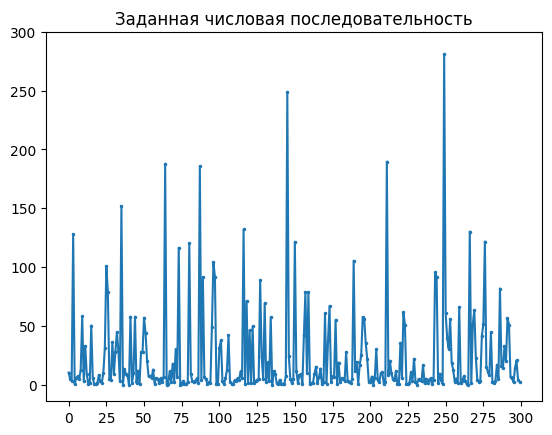

In [251]:
plt.figure() # 创建第一个图的窗口
np_nums = np.array(originalSequence)
x = np.arange(0,300)
plt.plot(x,np_nums, marker='o',markersize=1.5)

plt.xticks(np.arange(0,325, 25))
plt.yticks(np.arange(0,350,50))
plt.title("Заданная числовая последовательность")
# 保存图形到文件
plt.savefig('1.png')

Коэффициент АК со сдвигом 1: -0.02
Коэффициент АК со сдвигом 2: -0.01
Коэффициент АК со сдвигом 3: -0.10
Коэффициент АК со сдвигом 4: -0.08
Коэффициент АК со сдвигом 5: -0.02
Коэффициент АК со сдвигом 6: 0.03
Коэффициент АК со сдвигом 7: 0.03
Коэффициент АК со сдвигом 8: -0.09
Коэффициент АК со сдвигом 9: 0.07
Коэффициент АК со сдвигом 10: 0.01


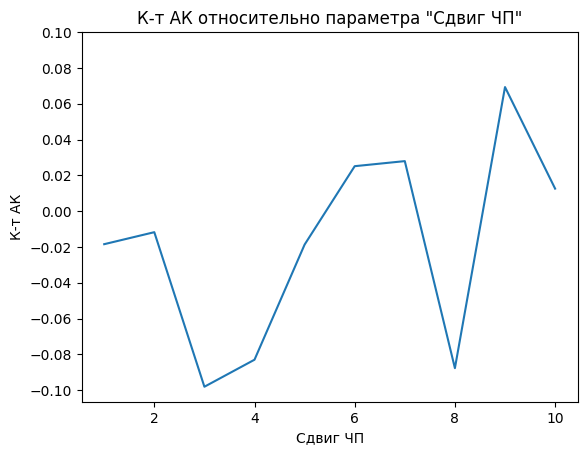

In [252]:
n = 11
acf_values, conf_int = sm.tsa.acf(originalSequence, nlags=n - 1, alpha=0.05)
# 绘制自相关图
lags = np.arange(1, n)
plt.figure()
plt.plot(lags, acf_values[1:])
plt.yticks(np.arange(-0.1, 0.12, 0.02))
plt.xlabel('Сдвиг ЧП')
plt.ylabel('К-т АК')
plt.title("К-т АК относительно параметра \"Сдвиг ЧП\"")
plt.savefig("2.png")

for i in range(1, len(acf_values)):
    print("Коэффициент АК со сдвигом %d: %.2f" % (i, acf_values[i]))


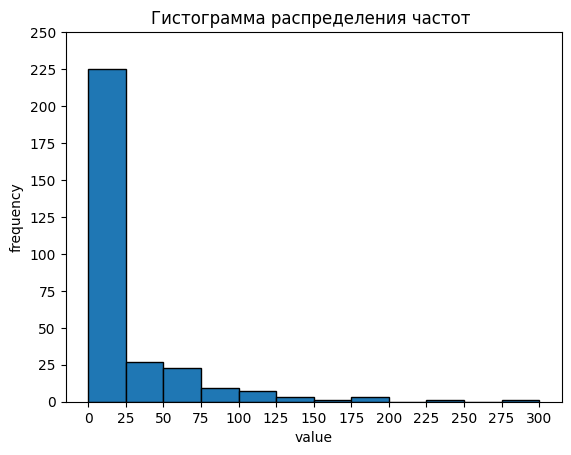

In [253]:
plt.figure()
# 绘制频率直方图
plt.hist(originalSequence, bins=np.arange(0,325,25), edgecolor='black') 
# 添加标题和标签
plt.title('Гистограмма распределения частот ')
plt.xlabel('value')
plt.ylabel('frequency')
plt.xticks(np.arange(0,325,25))
plt.yticks(np.arange(0,275,25))
# 显示图形
plt.savefig('3.png')

In [254]:
# generatedSequence = generate_sequence(originalSequence)
generatedSequence = read_nums("./generated_sequence.csv")

cal_characteristics(generatedSequence,10)
cal_characteristics(generatedSequence,20)
cal_characteristics(generatedSequence,50)
cal_characteristics(generatedSequence,100)
cal_characteristics(generatedSequence,200)
cal_characteristics(generatedSequence,300)

Count of elements:10
математическое ожидание: 18.59
percentage: -18.62
дисперсия: 872.52
percentage: -35.49
среднеквадратическое отклонение: 29.54
percentage: -19.68
коэффициент вариации: 1.59
percentage: -1.31
доверительные интервалы для оценки математического ожидания с доверительными вероятностями 0,9; 0,95 и 0,99:
15.36
percentage: 339.93
18.31
percentage: 339.93
24.06
percentage: 339.93

Count of elements:20
математическое ожидание: 19.21
percentage: -15.91
дисперсия: 585.58
percentage: -56.70
среднеквадратическое отклонение: 24.20
percentage: -34.20
коэффициент вариации: 1.26
percentage: -21.75
доверительные интервалы для оценки математического ожидания с доверительными вероятностями 0,9; 0,95 и 0,99:
8.90
percentage: 154.84
10.61
percentage: 154.84
13.94
percentage: 154.84

Count of elements:50
математическое ожидание: 19.04
percentage: -16.65
дисперсия: 764.27
percentage: -43.49
среднеквадратическое отклонение: 27.65
percentage: -24.83
коэффициент вариации: 1.45
percentage: -9.

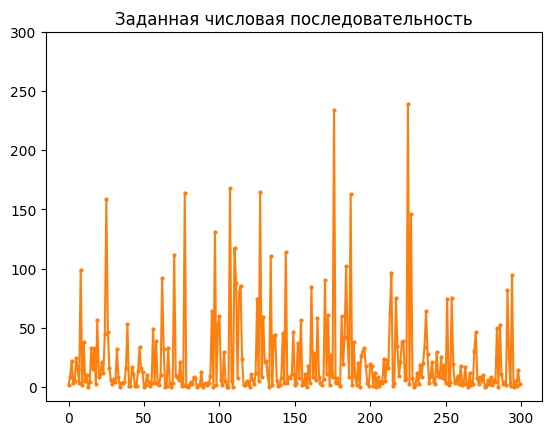

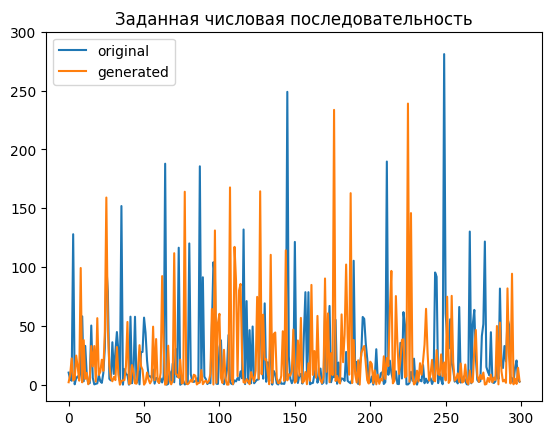

In [255]:
plt.figure() # 创建第一个图的窗口
np_nums = np.array(generatedSequence)
x = np.arange(0,300)
plt.plot(x,np_nums, color='C1', marker='o',markersize=2)

plt.yticks(np.arange(0,350,50))
plt.title("Заданная числовая последовательность")
# 保存图形到文件
plt.savefig('4-1.png')

plt.figure() # 创建第一个图的窗口
np_nums1 = np.array(originalSequence)
np_nums2 = np.array(generatedSequence)
x = np.arange(0,300)
plt.plot(x,np_nums1, label='original')
plt.plot(x,np_nums2, label='generated')
plt.legend()
plt.yticks(np.arange(0,350,50))
plt.title("Заданная числовая последовательность")
# 保存图形到文件
plt.savefig('4-2.png')

Коэффициент АК оригинальной:
Коэффициент АК со сдвигом 1: -0.02
Коэффициент АК со сдвигом 2: -0.01
Коэффициент АК со сдвигом 3: -0.10
Коэффициент АК со сдвигом 4: -0.08
Коэффициент АК со сдвигом 5: -0.02
Коэффициент АК со сдвигом 6: 0.03
Коэффициент АК со сдвигом 7: 0.03
Коэффициент АК со сдвигом 8: -0.09
Коэффициент АК со сдвигом 9: 0.07
Коэффициент АК со сдвигом 10: 0.01

Коэффициент АК генерации:
Коэффициент АК со сдвигом 1: -0.08
Коэффициент АК со сдвигом 2: 0.09
Коэффициент АК со сдвигом 3: 0.05
Коэффициент АК со сдвигом 4: 0.02
Коэффициент АК со сдвигом 5: -0.06
Коэффициент АК со сдвигом 6: -0.03
Коэффициент АК со сдвигом 7: 0.08
Коэффициент АК со сдвигом 8: 0.03
Коэффициент АК со сдвигом 9: -0.07
Коэффициент АК со сдвигом 10: 0.02


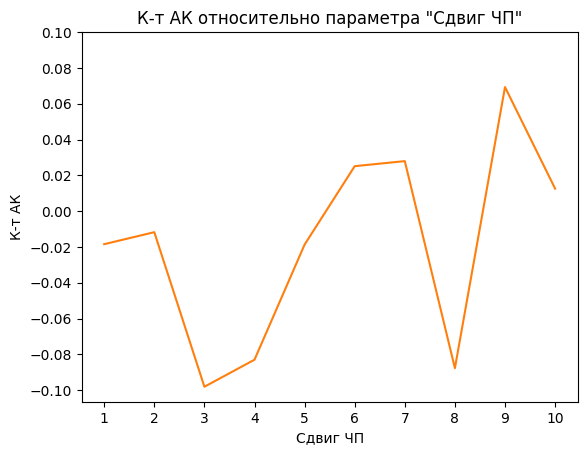

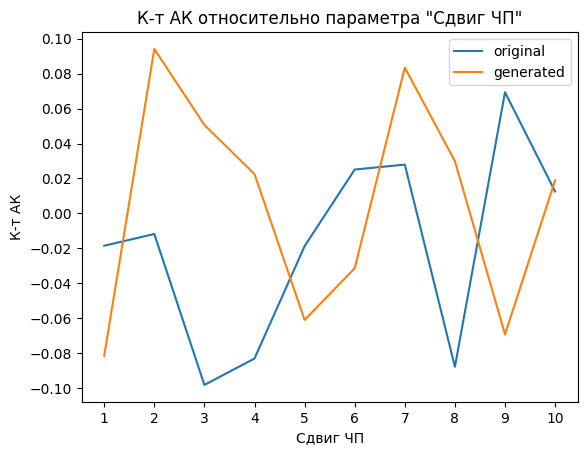

In [256]:
n = 11
# 绘制自相关图
lags = np.arange(1, n)

acf_values_origin, conf_int_origin = sm.tsa.acf(originalSequence, nlags=n - 1, alpha=0.05)
acf_values_generated, conf_int_generated = sm.tsa.acf(generatedSequence, nlags=n - 1, alpha=0.05)

plt.figure()
plt.plot(lags, acf_values_origin[1:], color='C1')
plt.xticks(np.arange(1,11,1))
plt.yticks(np.arange(-0.1, 0.12, 0.02))
plt.xlabel('Сдвиг ЧП')
plt.ylabel('К-т АК')
plt.title("К-т АК относительно параметра \"Сдвиг ЧП\"")
plt.savefig("5-1.png")

print("Коэффициент АК оригинальной:")
for i in range(1, len(acf_values)):
    print("Коэффициент АК со сдвигом %d: %.2f" % (i, acf_values[i]))

plt.figure()
plt.plot(lags, acf_values_origin[1:], label='original')
plt.plot(lags, acf_values_generated[1:], label='generated')
plt.legend()
plt.xlabel('Сдвиг ЧП')
plt.ylabel('К-т АК')
plt.xticks(np.arange(1,11,1))
plt.yticks(np.arange(-0.1, 0.12, 0.02))
plt.title("К-т АК относительно параметра \"Сдвиг ЧП\"")
plt.savefig("5-2.png")

print()
print("Коэффициент АК генерации:")
for i in range(1, len(acf_values_generated)):
    print("Коэффициент АК со сдвигом %d: %.2f" % (i, acf_values_generated[i]))


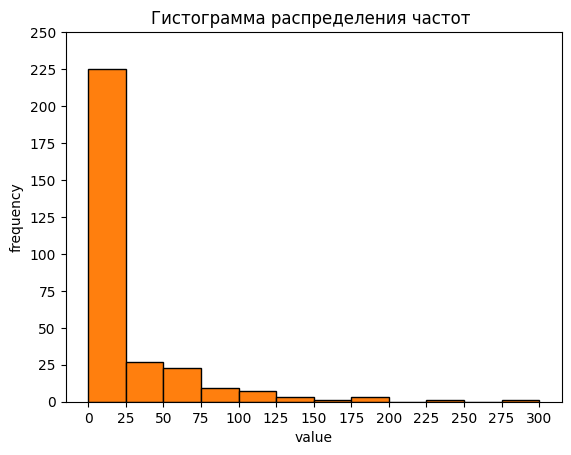

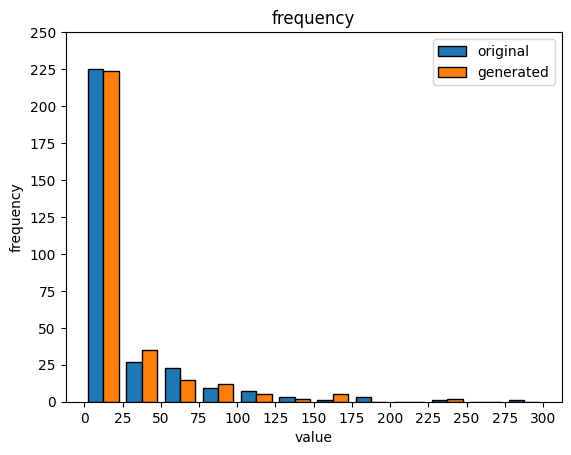

In [257]:
plt.figure()
# 绘制频率直方图
plt.hist(originalSequence, bins=np.arange(0,325,25), color='C1', edgecolor='black') 
# 添加标题和标签
plt.title('Гистограмма распределения частот ')
plt.xlabel('value')
plt.ylabel('frequency')
plt.xticks(np.arange(0,325,25))
plt.yticks(np.arange(0,275,25))
# 显示图形
plt.savefig('6-1.png')

plt.figure()
# 绘制频率直方图
# 组合数据
data_combined = [originalSequence, generatedSequence]
# 绘制直方图
plt.hist(data_combined, bins=np.arange(0,325,25), label=['original', 'generated'], edgecolor='black')
plt.legend()

# 添加标题和标签
plt.title('frequency')
plt.xlabel('value')
plt.ylabel('frequency')
plt.xticks(np.arange(0,325,25))
plt.yticks(np.arange(0,275,25))
# 显示图形
plt.savefig('6-2.png')

In [258]:
correlation_coefficient, _ = pearsonr(np.sort(np.array(originalSequence)),np.sort(np.array(generatedSequence)))
print("r=%.3f"%correlation_coefficient)

r=0.995


In [259]:
printArray(generatedSequence)

# np.savetxt('generated_sequence.csv', generatedSequence, delimiter=',', fmt='%.3f')

2.135
8.472
22.339
3.601
4.866
24.796
14.977
3.459
99.208
2.076
37.917
5.058
10.137
0.422
4.144
32.892
15.58
32.893
2.69
56.579
8.309
10.948
21.256
11.81
45.098
159.069
46.945
16.508
5.858
2.967
6.625
3.942
32.043
8.574
0.041
3.288
3.695
4.094
15.758
53.378
0.738
0.986
16.725
11.511
1.263
0.897
13.462
33.62
15.779
12.74
0.07
2.064
10.424
4.401
1.17
3.558
49.362
3.874
38.838
3.013
1.461
10.119
92.309
32.613
0.032
1.094
33.171
3.5
0.391
3.422
111.774
9.346
8.406
5.9
21.327
1.07
1.82
163.999
0.883
0.485
1.837
3.975
2.419
8.517
7.725
0.254
1.42
1.876
12.472
0.501
2.541
3.452
1.518
3.246
9.233
64.418
0.19
131.094
1.617
52.501
60.265
5.901
1.498
29.699
5.531
0.165
0.137
167.657
5.381
0.543
117.153
88.231
7.338
80.111
85.662
24.011
2.146
1.58
4.785
3.059
0.442
10.79
6.126
2.889
12.018
74.657
5.086
164.359
8.908
59.54
21.374
21.734
10.325
0.47
110.404
1.668
43.123
44.394
5.623
1.221
1.812
7.675
45.466
3.331
114.207
3.753
8.785
7.728
11.492
46.901
1.721
3.303
37.625
7.667
56.819
1.745
2.959
10.